Najprej skonstruiramo random slovar. Kateri nam vrne za vsako povezavo svoj uncertainty set.

In [76]:
import random
import sage.graphs.graph_plot
from sage.graphs.base.boost_graph import *


In [93]:
def gen_vh_pod(st_opazanj, st_pov_grafa):
    surovi_podatki = {}
    for i in range(0, st_opazanj):
        mer_povezav = []
        for j in range(0, st_pov_grafa): 
            mer_povezav.append(random.randint(1,5))
        surovi_podatki[i] = mer_povezav
    return(surovi_podatki)

gen_vh_pod(3,10)
gen_vh_pod(3,10)[0][0]

{0: [2, 4, 4, 3, 4, 1, 1, 1, 1, 4],
 1: [4, 2, 5, 1, 1, 5, 5, 5, 2, 4],
 2: [3, 3, 3, 5, 2, 5, 4, 1, 4, 2]}

In [207]:
#M3 = Matrix([[0,1,-1],[-1,0,-1/2],[1,1/2,0]])
#M4 = Matrix([[0,1.2,-3],[-1,0,-0.35],[1,0.4,0]])
#G3 = DiGraph(M3,sparse=True,weighted=True)
#G4 = DiGraph(M4, sparse= True, weighted=True)
##g = graphs.RandomGNM(15, 20)  # 15 vertices and 20 edges
##show(g)
##g.incidence_matrix()
#M3
#G3.show(edge_labels=True)
#M4
#G4.show(edge_labels=True)

{0: [2, 5, 4, 1, 3, 2, 4, 3, 5, 1], 1: [3, 3, 5, 1, 1, 1, 3, 3, 1, 4], 2: [2, 3, 2, 3, 2, 5, 5, 1, 4, 2]}


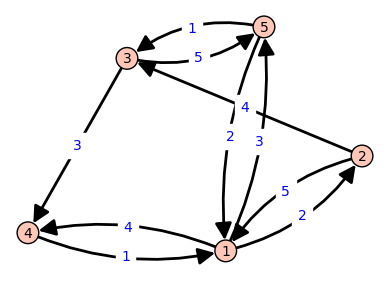

In [214]:
seznam1 = gen_vh_pod(3,10)
print(seznam1)
    
G_seznam = [(1,2,seznam1[0][0]),(2,1,seznam1[0][1]),(1,4,seznam1[0][2]),(4,1,seznam1[0][3]),(1,5,seznam1[0][4]),(5,1,seznam1[0][5]),(2,3,seznam1[0][6]),
            (3,4,seznam1[0][7]),(3,5,seznam1[0][8]),(5,3,seznam1[0][9])]
Grafek = DiGraph(G_seznam, weighted=True)
Grafek.show(edge_labels=True)

st_vozlisc = Grafek.order()

#def risanje_grafa(seznam,cene_povezav):
#    seznam
#    for i in range(0, length(cene_povezav)):
#        for i in range(0, length(list(cene_povezav)[i])):
#            seznam
            
        

{0: [1, 1, 2, 5, 1, 3, 1, 2, 3, 1], 1: [2, 3, 2, 4, 2, 4, 2, 4, 5, 4], 2: [2, 3, 3, 4, 1, 4, 3, 3, 4, 4], 3: [4, 1, 1, 3, 2, 1, 3, 4, 3, 3], 4: [3, 4, 5, 2, 4, 3, 3, 4, 1, 3]}


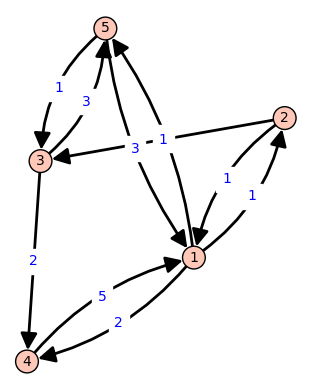

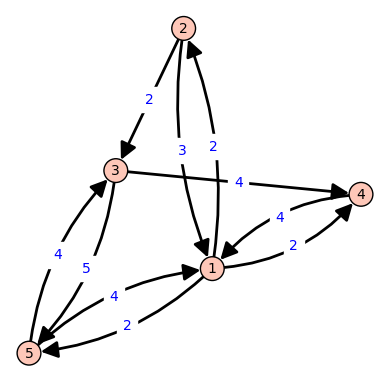

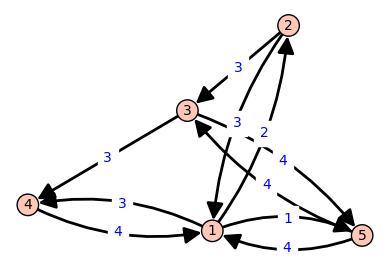

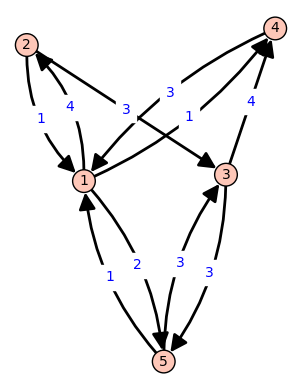

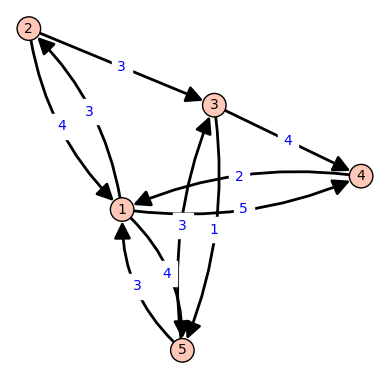

[[(1, 2, 1), (2, 1, 1), (1, 4, 2), (4, 1, 5), (1, 5, 1), (5, 1, 3), (2, 3, 1), (3, 4, 2), (3, 5, 3), (5, 3, 1)], [(1, 2, 2), (2, 1, 3), (1, 4, 2), (4, 1, 4), (1, 5, 2), (5, 1, 4), (2, 3, 2), (3, 4, 4), (3, 5, 5), (5, 3, 4)], [(1, 2, 2), (2, 1, 3), (1, 4, 3), (4, 1, 4), (1, 5, 1), (5, 1, 4), (2, 3, 3), (3, 4, 3), (3, 5, 4), (5, 3, 4)], [(1, 2, 4), (2, 1, 1), (1, 4, 1), (4, 1, 3), (1, 5, 2), (5, 1, 1), (2, 3, 3), (3, 4, 4), (3, 5, 3), (5, 3, 3)], [(1, 2, 3), (2, 1, 4), (1, 4, 5), (4, 1, 2), (1, 5, 4), (5, 1, 3), (2, 3, 3), (3, 4, 4), (3, 5, 1), (5, 3, 3)]]
5


In [230]:
seznam1 = gen_vh_pod(5,10)
print(seznam1)

graf_seznam = []
for j in range(0, len(seznam1)):
    a = [(1,2,seznam1[j][0]),(2,1,seznam1[j][1]),(1,4,seznam1[j][2]),(4,1,seznam1[j][3]),(1,5,seznam1[j][4]),(5,1,seznam1[j][5]),(2,3,seznam1[j][6]), (3,4,seznam1[j][7]),(3,5,seznam1[j][8]),(5,3,seznam1[j][9])]
    graf_seznam.append(a)
    Grafek = DiGraph(a, weighted=True)
    Grafek.show(edge_labels=True)
    st_vozlisc = Grafek.order()
print(graf_seznam)
print(st_vozlisc)
        

#G_seznam = [(1,2,seznam1[0][0]),(2,1,seznam1[0][1]),(1,4,seznam1[0][2]),(4,1,seznam1[0][3]),(1,5,seznam1[0][4]),(5,1,seznam1[0][5]),(2,3,seznam1[0][6]),
#            (3,4,seznam1[0][7]),(3,5,seznam1[0][8]),(5,3,seznam1[0][9])]
#Grafek = DiGraph(G_seznam, weighted=True)
#Grafek.show(edge_labels=True)



In [82]:
#def generiranje_uncertainty_sets(st_poti):
#    nakljucna_cela = {}
#    for j in range(1, st_poti+1):
#        nakljucna = []
#        for i in range(0,4): #koliko števil je v množici
#            n = random.randint(1,30)
#            nakljucna.append(n)
#        nakljucna_cela[j] = nakljucna
#    return(nakljucna_cela)
#
#generiranje_uncertainty_sets(10)
#

{1: [8, 24, 4, 30],
 2: [26, 27, 7, 13],
 3: [18, 19, 1, 21],
 4: [3, 27, 6, 5],
 5: [9, 25, 30, 8],
 6: [28, 24, 29, 30],
 7: [8, 1, 16, 27],
 8: [9, 20, 11, 2],
 9: [5, 22, 19, 20],
 10: [4, 30, 5, 8]}

Narišimo najprej za majhne grafe. Graf z 7 vozlišči.




In [208]:
#seznam = [(1,3,3),(1,5,3),(5,1,4),(4,2,4),(5,2,5),(3,4,6),(3,5,7),(5,4,8),(2,6,9),(4,6,13),(6,7,13)]
#d=DiGraph([[1..7],seznam], weighted=True)
#d.show(edge_labels=True)
#
#short = shortest_paths(d, start = 1, weight_function = None, algorithm=None)
#print(short)
#d.all_paths(start=1, end=7, use_multiedges=True, report_edges=False, labels=False)



Naredimo funkcijo, ki nam išče najkrajšo pot v grafu.  (Tega za zdaj ne rabimo.)

In [100]:
def BFS_SP(graph, start, goal): 
    explored = [] 
    queue = [[start]] 
    if start == goal: 
        print("Same Node") 
        return
    while queue: 
        path = queue.pop(0) 
        node = path[-1] 
        if node not in explored: 
            neighbours = graph[node] 
            for neighbour in neighbours: 
                new_path = list(path) 
                new_path.append(neighbour) 
                queue.append(new_path) 
                if neighbour == goal: 
                    print("Shortest path = ", *new_path) 
                    return(new_path)
            explored.append(node) 
    print("So sorry, but a connecting path doesn't exist.")
    return(new_path)

new = BFS_SP(d,1,7)
print(new)

Shortest path =  1 3 4 6 7
[1, 3, 4, 6, 7]


In [0]:
#nase_st_vozlisc = Grafek.order()
#
#def kon_zac(graf):
#    par_voz =[]
#    st_voz = graf.order()
#    start = random.randint(0,st_voz)
#    end = random.randint(0,st_voz)
#    if end == start:
#        kon_zac(graf)
#    else:
#        start_end(stevilo) 
#
#print(start_end(nase_st_vozlisc))

Sestavimo vektor x

In [232]:
#to je za prvi oklepaj v vseh poteh
#pot = (vse_poti[0])
#print(pot)
#prvi_oklepaj = list(zip(pot, pot[1:] + pot[:1])) 
#print(prvi_oklepaj[:-1])

#to nam vzame samo prve dve številke v seznamu od grafa
#par = []
#for i in range(0,len(G_seznam)):
#    par.append(G_seznam[i][0:2])
#print(par)
#
#vektor x za prvo pot
#x=[]
#for i in range(0, len(par)):
#    if par[i] in prvi_oklepaj:
#        x.append(1)
#    else:
#        x.append(0)
#print(x)


nase_st_vozlisc = Grafek.order()
start = random.randint(1, nase_st_vozlisc)
end = random.randint(1, nase_st_vozlisc)
poti = Grafek.all_paths(start, end, use_multiedges=True, report_edges=False, labels=False)

#definicija za delanje vseh vektorjev ki so v seznamu:-to je to kar v resnici rabimo
def vektorji_x(vse_poti):
    par = []
    for i in range(0,len(G_seznam)):
        par.append(G_seznam[i][0:2])
    print(par)
    seznam_vektorjev = []
    for i in range(0, len(vse_poti)):
        pot = (vse_poti[i])
        prvi_oklepaj1 = list(zip(pot, pot[1:] + pot[:1]))
        prvi_oklepaj = prvi_oklepaj1[:-1]
        x=[]
        for i in range(0, len(par)):
            if par[i] in prvi_oklepaj:
                x.append(1)
            else:
                x.append(0)
        seznam_vektorjev.append(x)
    return(seznam_vektorjev)

vektorji_x(poti)

[(1, 2), (2, 1), (1, 4), (4, 1), (1, 5), (5, 1), (2, 3), (3, 4), (3, 5), (5, 3)]


[[1, 0, 0, 0, 0, 1, 0, 0, 0, 0], [1, 0, 0, 1, 0, 0, 0, 1, 0, 1]]

tega naprej načeloma ne rabiva (da je gor cela množica):

In [209]:
#a = generiranje_uncertainty_sets(10).values()
#print(a)
#print(list(a)[0])
#

#u=DiGraph([[1..7],[(1,3,list(a)[0]),(1,5,list(a)[1]),(4,2,list(a)[2]),(5,2,list(a)[3]),(3,4,list(a)[4]),(3,5,list(a)[5]),(5,4,list(a)[6]),(2,6,list(a)[7]),(4,6,list(a)[8]),(6,7,list(a)[9])]])
#u.show(edge_labels=True)

Vektorski produkti
